# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='c:/Reacher_20/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
from agent import Agent
from collections import deque

In [6]:
agent = Agent(33,4,20,42)

In [7]:
import torch
env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations
score = np.zeros(20)

mean_score = deque(np.zeros(100),100)
i = 0
stat = []
while True:
    action = agent.act(state)
    action = np.clip(action, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(action)[brain_name]           # send all actions to tne environment
    next_state = env_info.vector_observations         # get next state (for each agent)
    reward = env_info.rewards                         # get reward (for each agent)
    done = env_info.local_done                        # see if episode finished
    score += env_info.rewards                         # update the score (for each agent)
    agent.step(actions=action,dones=done,next_states=next_state,rewards=reward,states=state)
    state = next_state # roll over states to next time step
    if np.any(done):                                  # exit loop if episode finished
        mean=np.mean(score)
        mean_score.append(mean)
        i = i + 1
        stat.append((i,mean))
        print("Episode {}, score {} (moving mean {})       ".format(i,mean,np.mean(mean_score)),end='\r')
        if i % 5 == 0:
            print()
            torch.save(agent.actor_local.state_dict(), 'checkpoints/checkpoint.ep{}.actor.pth'.format(i))
            torch.save(agent.critic_local.state_dict(), 'checkpoints/checkpoint.ep{}.critic.pth'.format(i))
        if (np.mean(mean_score) > 30):
            break
        score = np.zeros(20)
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations

torch.save(agent.actor_local.state_dict(), 'solved.actor.pth'.format(i))
torch.save(agent.critic_local.state_dict(), 'solved.critic.pth'.format(i))
import pickle as pkl
with open('stat.pk','wb') as f:
    pkl.dump(file=f,obj=stat)
print('\nSolved in {} episodes'.format(i))

Episode 5, score 0.2319999948143959 (moving mean 0.02440499945450574)         
Episode 10, score 1.358999969623983 (moving mean 0.0791949982298538)        
Episode 15, score 4.60149989714846 (moving mean 0.25054499439988287)         
Episode 20, score 7.367999835312366 (moving mean 0.571074987235479)         
Episode 25, score 10.372499768156558 (moving mean 1.0695099760945888)       
Episode 30, score 17.866499600652606 (moving mean 1.8472399587109687)       
Episode 35, score 25.844999422319233 (moving mean 3.0079599327668545)       
Episode 40, score 34.1164992374368 (moving mean 4.638264896326699)         
Episode 45, score 37.113499170448634 (moving mean 6.494364854839631)       
Episode 50, score 32.815999266505244 (moving mean 8.316914814102464)       
Episode 55, score 36.18649919116869 (moving mean 10.074554774816146)       
Episode 60, score 37.55699916053563 (moving mean 11.885009734349328)       
Episode 65, score 37.7324991566129 (moving mean 13.764639692336319)         
E

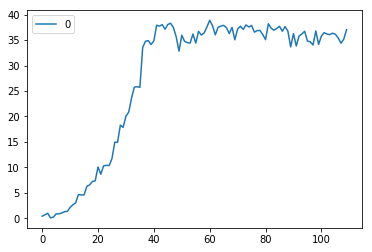

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame([x[1] for x in stat]).plot()
plt.show()

In [10]:
env.close()